In [1]:
!pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable


## IMPORT LIBRARIES

In [2]:
import re
import csv
import json
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

## DATA PROCESSING

### EXERCISE 1
##### LOAD IN CSV DATASET
###### A CSV data can be read in as  dictionaries using ".DictReader()" method(Alexander and Schiller,2022) and (TwisttedSim,2018).
###### This file was read in with "with open()" , applying "try and Except" as showed in workshop exercise. 

In [3]:
acw_list_of_dict_data = []       #created an empty list
try:
    with open("acw_user_data.csv", mode = 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter = ',' ) #read in dataset as dictionaries

        for data in csv_reader:
            acw_list_of_dict_data.append(data) #appended the data into the empty list "acw_list_of_dict_data"
except FileNotFoundError as err:    #if file is not found
    print("Ooops!, we forgot to put our file in directory. see error message below:") #print this
    print(err)   #then, print the error
else:
    print(acw_list_of_dict_data)  #else, error isn't found and file was successful, print the list of dictionaries.

[{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}, {'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'C

### EXERCISE 2

##### First, the dictionary key "Bank IBAN" was renamed to "Credit Card Bank IBAN" using the ".pop()" method (The Programming Expert,2022)". 

##### The different values that weren't in their types, were cast into their respective data types.

##### From the library "re" called "regular expression" which was imported in the cell above,was used with the ".search()" method to search if a keyword matches another(W3Schools,1999-2022). 

##### The methods: ".replace()", ".lstrip()", ".lower()" were used to respectively replace spaces or keywords, strip columns from the left and change keys into lower case.

##### Adding comments to defined functions (Pandas docstrings guide,2022).

In [4]:
#iterated through the list of dictionaries and changed the key 'Bank IBAN' to 'Credit Card Bank IBAN'
for dictionary in acw_list_of_dict_data:
    dictionary['Credit Card Bank IBAN'] = dictionary.pop('Bank IBAN')  

In [5]:
#converted the different values found in these keys into their respective data types and applied "try and except ValueError".
for dicts in acw_list_of_dict_data:
    for key, value in dicts.items():
        try:
            if key =='Credit Card CVV' or key =='Age (Years)' or key =='Dependants' or key =='Credit Card Number':
                dicts[key] = int(value)
            elif key =='Distance Commuted to Work (miles)' or key =='Yearly Salary (GBP)' or key =='Yearly Pension (GBP)':
                dicts[key] = float(value)
            elif key == 'Retired':
                if dicts[key] == 'True':
                    dicts[key] = True
                else:
                    dicts[key] = False
        except ValueError:
            pass

In [6]:
keys_to_nest = {'Address':'Address', 'Credit Card':'Credit Card', 'Vehicle':'Vehicle', 'Name':'Name','Yearly':'Yearly'}

key_dict = {}
for new_key , value in keys_to_nest.items():
    key_list = []
    for old_key in acw_list_of_dict_data[0]:
        search_key = re.search(new_key, old_key)  #check if the new_key and old_key match
        if search_key:  #if true
            key_list.append(old_key)  #return old keys as lists
            key_dict[value] = key_list  #set new keys and assign the lists of old keys to them
key_dict

{'Address': ['Address Street', 'Address City', 'Address Postcode'],
 'Credit Card': ['Credit Card Start Date',
  'Credit Card Expiry Date',
  'Credit Card Number',
  'Credit Card CVV',
  'Credit Card Bank IBAN'],
 'Vehicle': ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
 'Name': ['First Name', 'Last Name'],
 'Yearly': ['Yearly Pension (GBP)', 'Yearly Salary (GBP)']}

In [7]:
def nested_structures(cols_nesting, data):
    """ 
    This function helps to replace the keys in the data with the nested keys in key_dict,
    left strip the nested keys and change them to lower case
    """
    new_acw_list = []                       
    for nesting_item in data:  #for the dictionaries in the original data set
        for key_word in cols_nesting: #for the keys in key_dict
            cols = cols_nesting[key_word] #each list(i.e values) equals key_dict['of each key']
            nested_col = {}
            for col in cols: #for each item in the list
                if col in nesting_item.keys():  #if each item is contained as a key in the original data set
                    key = col.replace(key_word, '').lstrip().lower() #replace and converted to lower, each of the item with the key_word in key_dict and strip Address
                    nested_col[key] = nesting_item[col]
                    del nesting_item[col]
            nesting_item[key_word] = nested_col
        new_acw_list.append(nesting_item)
    return new_acw_list

acw_nested_data = nested_structures(key_dict, acw_list_of_dict_data)    

In [8]:
def update_acw_user_key(acw_dict_keys): 
    """this function helps to replace the space in the dictionary keys with '_'.
    the ".lower()" changes the keys to lower case.
    """
    acw_clean_keys = []                  
    
    for dictionary in acw_dict_keys:
        dict_clean_key_acw = {}
        for key, value in dictionary.items():
            keys_updated = key.lower().replace(' ', '_') #changed the dataset keys to lower case and replaced spaces with '_'.
            dict_clean_key_acw[keys_updated] = value
        acw_clean_keys.append(dict_clean_key_acw)
    return acw_clean_keys

#update_acw_user_key(acw_list_of_dict_data)

In [9]:
sort_keys_by = ["Name","Age (Years)","Sex","Retired","Marital Status","Dependants"]

def sorted_key_acw_data(acw_sort_by, acw_dict_keys):
    """
    this function is defined to sort the list of dictonaries by the given keys above
    """
    sorted_acw_data = []
    
    for dictionary in acw_dict_keys:  #for thedictionary in our data set
        sort_dict_acw_data = {}
        for key1, value1 in dictionary.items(): #for the keys & values in that dictionary
            dict_data = {}
            not_dict_data = {}
            for k_key in acw_sort_by:  #for each item in the keys to sort by
                dict_data[k_key] = dictionary[k_key]  #let the new key be sorted by the items in sort_keys_by
            sort_dict_acw_data.update(dict_data)
            if key1 not in acw_sort_by:     #for the keys not to be sorted
                not_dict_data[key1] = dictionary[key1]  #still return it as the dictionary key
            sort_dict_acw_data.update(not_dict_data)
        sorted_acw_data.append(sort_dict_acw_data)
    return sorted_acw_data

In [10]:
#called the two functions that dealt with changing the keys into lower case,replcaced the space in keys with '_' and 
#sorted the keys in the data set by the sort_keys_by

acw_updated_data = update_acw_user_key(sorted_key_acw_data(sort_keys_by, acw_nested_data))  
acw_updated_data

[{'name': {'first ': 'Kieran', 'last ': 'Wilson'},
  'age_(years)': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': 3,
  'distance_commuted_to_work_(miles)': 0.0,
  'employer_company': 'N/A',
  'address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'},
  'credit_card': {'start date': '08/18',
   'expiry date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'bank iban': 'GB62PQKB71416034141571'},
  'vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'type': 'Pickup'},
  'yearly': {'pension (gbp)': 7257.0, 'salary (gbp)': 72838.0}},
 {'name': {'first ': 'Jonathan', 'last ': 'Thomas'},
  'age_(years)': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'distance_commuted_to_work_(miles)': 13.72,
  'employer_company': 'Begum-Williams',
  'address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'post

### EXERCISE 3

##### Checked for dependant rows with problems (empty cells), printed out the index of the rows with the problems and then filled them up.

In [11]:
def problematic_dependant_rows(dependant_row):
    problematic_dep_rows = []
    
    for indx, value in enumerate(dependant_row):  #for index and value
        if value["dependants"] == '':      #if the values in the dependant entries is empty
            problematic_dep_rows.append(indx)  #append the position where it is empty to problematic_dep_rows list
    return problematic_dep_rows  #then return a list of those positions

print(problematic_dependant_rows(acw_updated_data))

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [12]:
def fill_empty_dependant_rows(data):
    for i in problematic_dependant_rows(data): #for all the entries empty at each position
        data[i]["dependants"] = 0   #fill the empty entries with 0
    return acw_updated_data

fill_empty_dependant_rows(acw_updated_data)

[{'name': {'first ': 'Kieran', 'last ': 'Wilson'},
  'age_(years)': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependants': 3,
  'distance_commuted_to_work_(miles)': 0.0,
  'employer_company': 'N/A',
  'address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'},
  'credit_card': {'start date': '08/18',
   'expiry date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'bank iban': 'GB62PQKB71416034141571'},
  'vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'type': 'Pickup'},
  'yearly': {'pension (gbp)': 7257.0, 'salary (gbp)': 72838.0}},
 {'name': {'first ': 'Jonathan', 'last ': 'Thomas'},
  'age_(years)': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'distance_commuted_to_work_(miles)': 13.72,
  'employer_company': 'Begum-Williams',
  'address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'post

### EXERCISE 4

##### Read in file as processed json

In [13]:
def write_to_file(data, file_name):
    """
    this function is to write in a file
    """
    with open(file_name, mode = 'w') as json_data:
        json.dump(data, json_data)
    print('File Uploaded')   #if file is uploaded successfully, print: 'File Uploaded'
    
write_to_file(acw_updated_data, 'processed.json') 

File Uploaded


In [14]:
def read_json_file(file_name):
    """
    thsi function is to read a file
    """
    with open(file_name, mode = 'r') as json_data:
        data = json.load(json_data)
    return data

acw_processed_json_data = read_json_file("processed.json")

### EXERCISE 5

#### Created two file ouputs; retired.json and employed.json

In [15]:
def create_employed_retired(data, created_file):
    """
    this function helps to separate customers who are either 
    retired or employed into different lists
    
list_1 is employed_list
list_2 is retired_list

if retired is True, append the customers to retired_list
if retired is not True, append the customers toemployed_list
    """
    employed_list = []
    retired_list = []
    
    for dictionary in data:
        if dictionary[created_file] == True:
            retired_list.append(dictionary)
        else:
            employed_list.append(dictionary)
    return retired_list, employed_list

In [16]:
retired_employed = create_employed_retired(acw_processed_json_data, "retired") #called the function

retired_persons = retired_employed[0] #assigned retired customers to the variable retired_persons
employed_persons = retired_employed[1]  #assigned employed customers to the variable employed_persons

#called the write_to_file function and wrote in the differrent files for the retired and employed customers.
write_to_file(retired_persons, 'retired.json' )   
write_to_file(employed_persons, 'employed.json')

File Uploaded
File Uploaded


### EXERCISE 6

##### Checked for issues with the credit card entries for any customer that has 10 years between their credit card start date and credit card expiry date. Also, considered the months.

In [17]:
acw_user = []

with open('acw_user_data.csv', mode = 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')

    for data in csv_reader:
        acw_user.append(data)

##### A function that will help the client decide whether to flag the credit card and write it to a separate json file called 'remove_ccard'.

In [18]:
def test_above_ten(data):
    """
    this function is to help detect credit cards that are above ten year
    and help the client to know which one to flag.
    """
    start_date = data[6]  #indexing for the start_date key
    expiry_date = data[7]  #indexing for the expiry_date key
    
    start_month = start_date[0:2]   #indexed the month of start_date
    start_year = start_date[3:]      #indexed the year of start_date
    
    expiry_month = expiry_date[0:2]   #indexed the month of expiry_date
    expiry_year = expiry_date[3:]     #indexed the year#
    
    
    year_difference = int(expiry_year) - int(start_year)
    month_difference = int(expiry_month) - int(start_month)
    
    if year_difference > 10 or (year_difference == 10 and month_difference > 0):
        return 'Flag'
    else:
        return 'Do not Flag'
    
test_above_ten(acw_user[1])  #once the index of each person is entered, it shows whether the card should be flagged or not.

'Do not Flag'

In [19]:
for line_no, line in enumerate(acw_user):
    if line_no == 0:
        continue
    print(line_no, test_above_ten(line))

1 Do not Flag
2 Flag
3 Do not Flag
4 Do not Flag
5 Do not Flag
6 Do not Flag
7 Flag
8 Flag
9 Do not Flag
10 Do not Flag
11 Do not Flag
12 Do not Flag
13 Do not Flag
14 Do not Flag
15 Do not Flag
16 Flag
17 Do not Flag
18 Do not Flag
19 Do not Flag
20 Do not Flag
21 Do not Flag
22 Do not Flag
23 Do not Flag
24 Flag
25 Do not Flag
26 Do not Flag
27 Do not Flag
28 Do not Flag
29 Do not Flag
30 Do not Flag
31 Flag
32 Do not Flag
33 Flag
34 Do not Flag
35 Flag
36 Flag
37 Do not Flag
38 Do not Flag
39 Do not Flag
40 Do not Flag
41 Flag
42 Flag
43 Do not Flag
44 Do not Flag
45 Do not Flag
46 Do not Flag
47 Do not Flag
48 Do not Flag
49 Do not Flag
50 Do not Flag
51 Do not Flag
52 Flag
53 Flag
54 Flag
55 Do not Flag
56 Flag
57 Flag
58 Do not Flag
59 Do not Flag
60 Do not Flag
61 Do not Flag
62 Do not Flag
63 Do not Flag
64 Flag
65 Do not Flag
66 Do not Flag
67 Do not Flag
68 Do not Flag
69 Flag
70 Do not Flag
71 Do not Flag
72 Do not Flag
73 Flag
74 Do not Flag
75 Do not Flag
76 Flag
77 Flag
7

686 Do not Flag
687 Do not Flag
688 Do not Flag
689 Do not Flag
690 Do not Flag
691 Do not Flag
692 Do not Flag
693 Do not Flag
694 Do not Flag
695 Flag
696 Do not Flag
697 Do not Flag
698 Flag
699 Flag
700 Do not Flag
701 Do not Flag
702 Do not Flag
703 Do not Flag
704 Do not Flag
705 Do not Flag
706 Do not Flag
707 Do not Flag
708 Do not Flag
709 Do not Flag
710 Flag
711 Do not Flag
712 Do not Flag
713 Flag
714 Do not Flag
715 Do not Flag
716 Flag
717 Flag
718 Do not Flag
719 Do not Flag
720 Flag
721 Do not Flag
722 Flag
723 Do not Flag
724 Do not Flag
725 Do not Flag
726 Do not Flag
727 Do not Flag
728 Do not Flag
729 Do not Flag
730 Do not Flag
731 Do not Flag
732 Do not Flag
733 Do not Flag
734 Do not Flag
735 Do not Flag
736 Do not Flag
737 Do not Flag
738 Flag
739 Do not Flag
740 Do not Flag
741 Do not Flag
742 Do not Flag
743 Flag
744 Do not Flag
745 Do not Flag
746 Do not Flag
747 Do not Flag
748 Do not Flag
749 Do not Flag
750 Flag
751 Flag
752 Do not Flag
753 Flag
754 Do not

### EXERCISE 7

##### Read in the processed.json file 
##### Calculated for a new attribute: "salary_commute"(the salary that a customer earns per mile of their commute)
##### Sorted the entire records based on the new attribute:"salaray_commute" using the "sorted()" method and calling "lambda" expression to sort the dictionary.
##### Wrote the file as commute.json

In [20]:
acw_processed_json_data[0]['yearly']['salary (gbp)']

72838.0

In [21]:
acw_processed_json_data = read_json_file("processed.json") #read in processed.json file

distance = "distance_commuted_to_work_(miles)"

for dictionary in acw_processed_json_data:
    if dictionary[distance] < 1:
        dictionary["salary_commute"] = dictionary['yearly']['salary (gbp)']
    else:
        #rounded the result of each salry_commute to two decimal places
        dictionary["salary_commute"] = round(dictionary['yearly']['salary (gbp)'] / dictionary[distance],2) 
        
#sorted the dictionarybased on salary_commute key.        
sorted(acw_processed_json_data, key = lambda dictionary: dictionary["salary_commute"]) 

[{'name': {'first ': 'Graeme', 'last ': 'Jackson'},
  'age_(years)': 52,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'single',
  'dependants': 2,
  'distance_commuted_to_work_(miles)': 5.52,
  'employer_company': 'Smith, Birch and Burke',
  'address': {'street': 'Studio 9 Reid lights',
   'city': 'South Ryan',
   'postcode': 'E27 9GY'},
  'credit_card': {'start date': '06/14',
   'expiry date': '04/29',
   'number': 4713424668774153,
   'cvv': 3053,
   'bank iban': 'GB09ELJH35362236053720'},
  'vehicle': {'make': 'Chevrolet',
   'model': 'Rally Wagon 1500',
   'year': '2011',
   'type': 'SUV'},
  'yearly': {'pension (gbp)': 0.0, 'salary (gbp)': 17046.0},
  'salary_commute': 3088.04},
 {'name': {'first ': 'Janet', 'last ': 'Quinn'},
  'age_(years)': 30,
  'sex': 'Female',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependants': 1,
  'distance_commuted_to_work_(miles)': 5.64,
  'employer_company': 'Wood-Davies',
  'address': {'street': 'Studio 34r 

In [22]:
write_to_file(acw_processed_json_data, "commute.json") #called the function "write_to_file" to write the commute.json file

File Uploaded


## DATA VISUALIZATION

### EXERCISE 1

##### IMPORT CSV DATA AS A DATAFRAME

In [23]:
acw_user_df = pd.read_csv('acw_user_data.csv', delimiter = ',')  #used pandas as pd to import dataframe
acw_user_df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [24]:
#indexed the salary and age columns from the dataframe and assigned them to different variables
salary = acw_user_df["Yearly Salary (GBP)"]  
age = acw_user_df["Age (Years)"]       

mean_salary = salary.mean()
print(mean_salary)
print(f"Mean Salary is £ {mean_salary}")
middle_age = age.median()
print(middle_age)
print(f"Middle age = {middle_age} years")

57814.078
Mean Salary is £ 57814.078
54.0
Middle age = 54.0 years


### EXERCISE 2

#### UNIVARIATE PLOTS

Choosing the "size of bin" when creating a plot may sometimes be necessary.
In the dependants_plot below, without the bins specified, we noticed the bins were separated from each other and in order to fix this, an array of bins was passed to bins in the seaborn plot(Waskom,2021:3021a).

In [25]:
#Calculating the number of bins required for bin width of 5

bin_width = 5
maximum_age = round(age.max())
minimum_age = round(age.min())

bin_number = int((maximum_age - minimum_age))/5  #the difference between the maximum and minimum age is the range

#bin_number = int(age_range / bin_width)
print(f"The number of bins for bin_width of 5 = {round(bin_number)}")

The number of bins for bin_width of 5 = 15


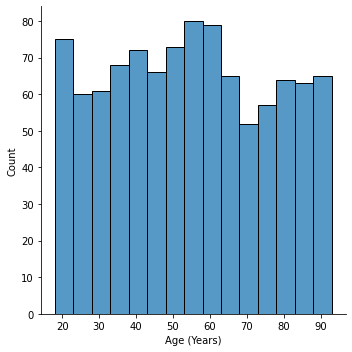

In [26]:
age_plot = sns.displot(data = acw_user_df, x = 'Age (Years)', binwidth = 5 ) #the univariate plot showing age in years

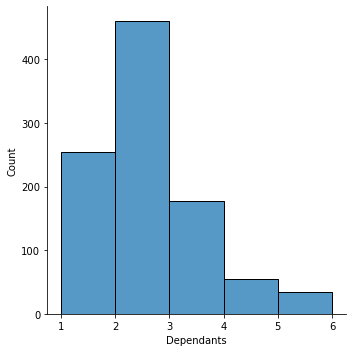

In [27]:
dependants_plot = sns.displot(acw_user_df, x ='Dependants', bins = [1,2,3,4,5,6]) #the plot showing number of dependants

To best visualize the age_marital_plot in a clearer form, the characteristics, "multiple" was passed as "stack"(Waskom,2021:3021b).

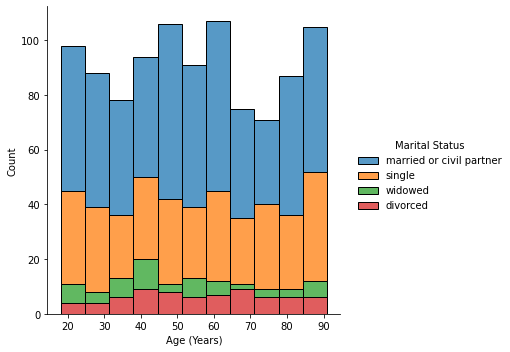

In [28]:
age_marital_plot = sns.displot(acw_user_df, x='Age (Years)', hue = 'Marital Status', multiple = 'stack')
#plot showing age in years, characterized by marital status

### EXERCISE 3

#### MULTIVARIATE PLOTS

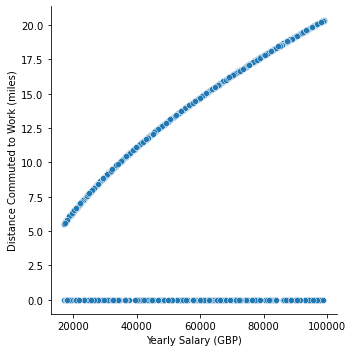

In [29]:
commutedist_salary = sns.relplot(data = acw_user_df, x ='Yearly Salary (GBP)', y ='Distance Commuted to Work (miles)')
#The multivariate plot showing the Dictance it takes an employee to get to work against his/her annual salary

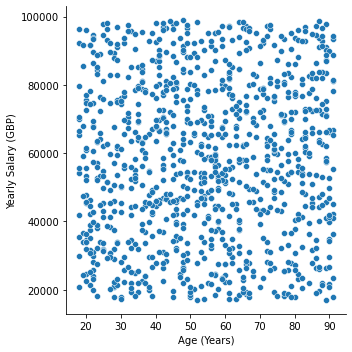

In [30]:
age_salary_plot = sns.relplot(data = acw_user_df, x ='Age (Years)', y='Yearly Salary (GBP)')
#The multivariate plot showing age in years and salary earned

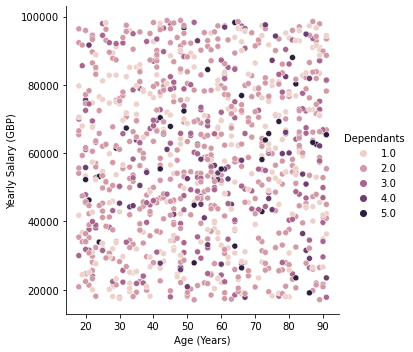

In [31]:
agesalary_dependants_plot = sns.relplot(data = acw_user_df, x='Age (Years)', y='Yearly Salary (GBP)', hue = 'Dependants')
#This shows the age in years and salary earned, characterized on on how many dependants the employee has.

### EXERCISE 4

#### Saving figures using save.fig()

In [32]:
# acw_figures_to_save = {}
# acw_figures_to_save["./age_plot.png"] = age_plot 
# acw_figures_to_save["./dependants_plot.png"] = dependants_plot
# acw_figures_to_save["./age_marital_plot.png"] = age_marital_plot
# acw_figures_to_save["./commutedist_salary.png"] = commutedist_salary
# acw_figures_to_save["./age_salary_plot.png"] = age_salary_plot
# acw_figures_to_save["./agesalary_dependants_plot.png"] = agesalary_dependants_plot


# for figure, image in acw_figures_to_save.items():
#     acw_figures_to_save[figure] = image.savefig(figure)

In [33]:
def to_save_figures(figures, name_figures_file):
    """
    this function will help client to save plots
    """
    acw_figures_to_save = {}
    #acw_figures_to_saveto_save[name_figures_file] = figures
    acw_figures_to_save[name_figures_file] = figures.savefig(name_figures_file)
    return acw_figures_to_save

In [34]:
#called the defined function to save my plots.
to_save_figures(age_plot, 'age_plot')
to_save_figures(dependants_plot, 'dependants_plot')
to_save_figures(age_marital_plot, 'age_marital_plot')
to_save_figures(commutedist_salary, 'commutedist_salary')
to_save_figures(age_salary_plot, 'age_salary_plot')
to_save_figures(agesalary_dependants_plot, 'agesalary_dependants_plot')

{'agesalary_dependants_plot': None}

## REFERENCES

##### Michael L. Waskom(PhD),2021. *The Open Journal, Seaborn: Statistical Data Visualization*, (vol.6, No60, pages 3021). Available Online: https://seaborn.pydata.org/tutorial/distributions.html, https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot [Accessed 09/11/2022].

##### Pandas, 2022. *Pandas docstrings Guide*. Available Online https://pandas.pydata.org/docs/development/contributing_docstring.html. [Accessed 14/11/2022].

##### The Programming Expert, June 6, 2022. *Rename Key in Dictionary in Python*. Available Online: https://theprogrammingexpert.com/rename-key-in-dictionary-python/ [Accessed 07/11/2022].

##### TwistedSim, 2018. Stackoverflow: *Python- How to create Dictionary from CSV data file using column headings*. Available Online: https://stackoverflow.com/questions/49868034/python-how-to-create-dictionary-from-csv-data-file-using-column-headings#:~:text=import%20csv%20with%20open%20%28filename%2C%20%27r%27%29%20as%20f%3A,%28float%2C%20values%29%29%20for%20header%2C%20%2Avalues%20in%20zip%20%28%2Al%29%7D [Accessed 07/11/2022].

##### W3Schools,2022 *Python RegEx*. Available Online: https://www.w3schools.com/python/python_regex.asp [Accessed 09/11/2022].

##### Will Alexander and Raye Schiller,2022. *Learn Python Basics*.Available Online: https://openclassrooms.com/en/courses/6902811-learn-python-basics/7091381-load-data-with-python#:~:text=Load%20Data%20With%20Python%201%20Load%20Data%20With,With%20CSV%20Files%20...%205%20Let%E2%80%99s%20Recap%21%20  [Accessed 05/11/2022 ].